In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


Loading Dataset

In [3]:
df1=pd.read_csv("fear_greed_index.csv")

In [4]:
df2=pd.read_csv("historical_data.csv")

In [ ]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Checking Datatype

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [5]:
#changing date column to correct datatype
df1['date']=pd.to_datetime(df1['date'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
df2["Timestamp IST"] = pd.to_datetime(df2["Timestamp IST"], format="%d-%m-%Y %H:%M")
df2["Date"]=df2["Timestamp IST"].dt.date

In [7]:
df2["Date"]=pd.to_datetime(df2["Date"])

In [8]:
#merging the dataset
df3=df1.merge(df2,left_on="date",right_on="Date",how="inner")

In [ ]:
df3.head()

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,...,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,1682919000,63,Greed,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,...,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01
1,1682919000,63,Greed,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,...,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01
2,1682919000,63,Greed,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,...,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01
3,1701754200,75,Extreme Greed,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,...,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,1.700000e+12,2023-12-05
4,1701754200,75,Extreme Greed,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,...,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,1.700000e+12,2023-12-05


**Visualization**

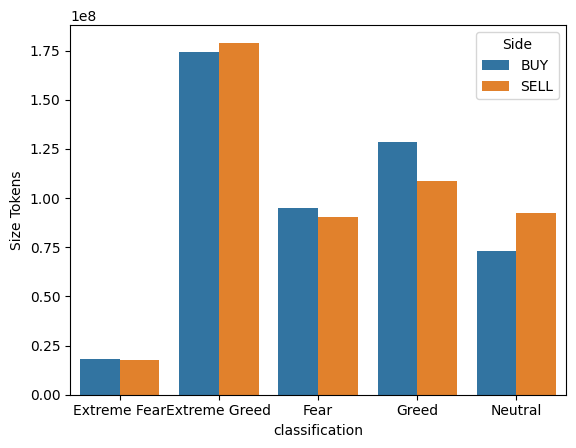

In [9]:
#1. Size vs Classification
a=df3.groupby(["classification","Side"])["Size Tokens"].sum().reset_index()
sns.barplot(x="classification",y="Size Tokens",hue="Side",data=a)
plt.xticks()
plt.savefig("Size Tokens vs Classification.png")
plt.show()

In [ ]:
a=df3.groupby(["classification","Side"])["Size Tokens"].sum().reset_index()
a

,classification,Side,Size Tokens
0,Extreme Fear,BUY,1.834020e+07
1,Extreme Fear,SELL,1.752391e+07
2,Extreme Greed,BUY,1.742315e+08
3,Extreme Greed,SELL,1.789944e+08
4,Fear,BUY,9.472625e+07
5,Fear,SELL,9.032974e+07
6,Greed,BUY,1.282775e+08
7,Greed,SELL,1.089176e+08
8,Neutral,BUY,7.303801e+07
9,Neutral,SELL,9.215362e+07


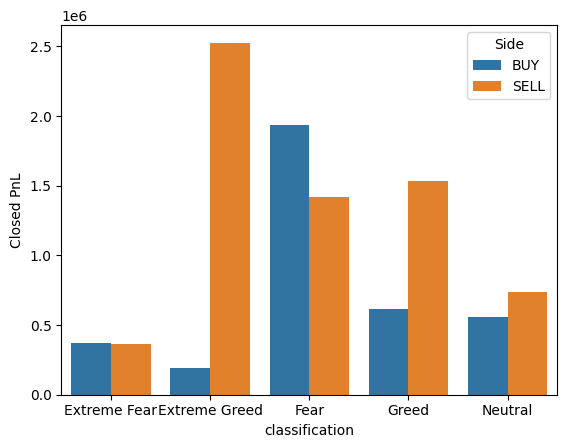

In [10]:
#Classification vs Profit
a=df3.groupby(["classification","Side"])["Closed PnL"].sum().reset_index()
sns.barplot(x="classification",y="Closed PnL",hue="Side",data=a)
plt.xticks()
plt.savefig("Profit vs Classification.png")
plt.show()

In [ ]:
a=df3.groupby(["classification","Side"])["Closed PnL"].sum().reset_index()
a

,classification,Side,Closed PnL
0,Extreme Fear,BUY,3.730434e+05
1,Extreme Fear,SELL,3.660668e+05
2,Extreme Greed,BUY,1.883508e+05
3,Extreme Greed,SELL,2.526821e+06
4,Fear,BUY,1.935073e+06
5,Fear,SELL,1.422082e+06
6,Greed,BUY,6.144566e+05
7,Greed,SELL,1.535673e+06
8,Neutral,BUY,5.544151e+05
9,Neutral,SELL,7.385056e+05


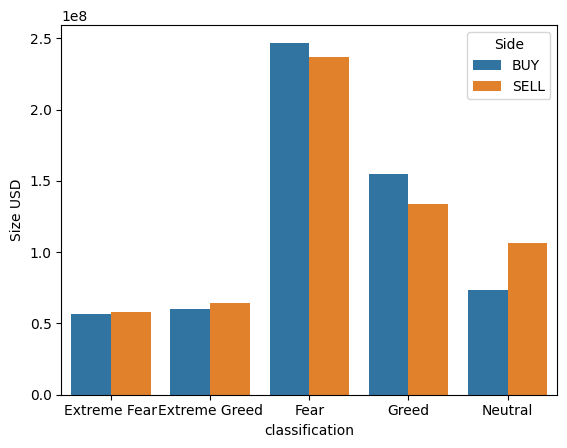

In [11]:
#Size USD vs Classification
a=df3.groupby(["classification","Side"])["Size USD"].sum().reset_index()
sns.barplot(x="classification",y="Size USD",hue="Side",data=a)
plt.xticks()
plt.savefig("Size USD vs Classification.png")
plt.show()

In [ ]:
a=df3.groupby(["classification","Side"])["Size USD"].sum().reset_index()
a

,classification,Side,Size USD
0,Extreme Fear,BUY,5.644103e+07
1,Extreme Fear,SELL,5.804323e+07
2,Extreme Greed,BUY,6.033284e+07
3,Extreme Greed,SELL,6.413232e+07
4,Fear,BUY,2.468417e+08
5,Fear,SELL,2.364830e+08
6,Greed,BUY,1.549883e+08
7,Greed,SELL,1.335942e+08
8,Neutral,BUY,7.362647e+07
9,Neutral,SELL,1.066156e+08


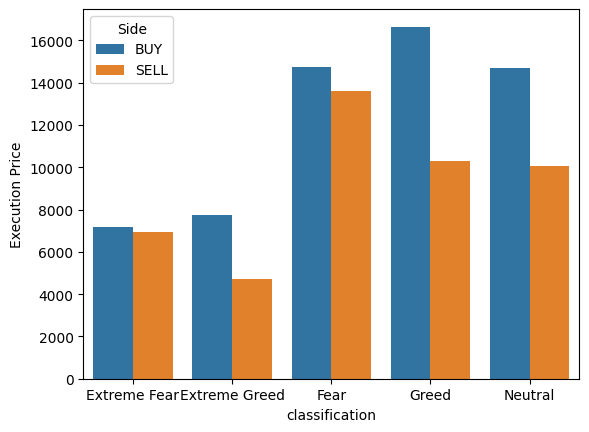

In [12]:
#Avg execution price vs classification
a=df3.groupby(["classification","Side"])["Execution Price"].mean().reset_index()
sns.barplot(x="classification",y="Execution Price",hue="Side",data=a)
plt.xticks()
plt.savefig("Avg execution price vs classification.png")
plt.show()

In [ ]:
a=df3.groupby(["classification","Side"])["Execution Price"].mean().reset_index()
a

,classification,Side,Execution Price
0,Extreme Fear,BUY,7155.717741
1,Extreme Fear,SELL,6949.339877
2,Extreme Greed,BUY,7746.260514
3,Extreme Greed,SELL,4728.426601
4,Fear,BUY,14734.476885
5,Fear,SELL,13594.670426
6,Greed,BUY,16647.555974
7,Greed,SELL,10319.784597
8,Neutral,BUY,14672.600553
9,Neutral,SELL,10084.102482


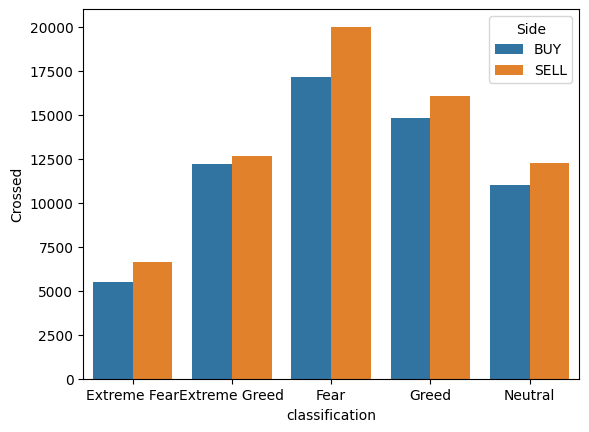

In [13]:
#Leverage (Crossed used as Proxy) vs Classification
a=df3.groupby(["classification","Side"])["Crossed"].sum().reset_index()
sns.barplot(x="classification",y="Crossed",hue="Side",data=a)
plt.xticks()
plt.savefig("Crossed vs Classification.png")
plt.show()

In [ ]:
a=df3.groupby(["classification","Side"])["Crossed"].sum().reset_index()
a

,classification,Side,Crossed
0,Extreme Fear,BUY,5484
1,Extreme Fear,SELL,6649
2,Extreme Greed,BUY,12193
3,Extreme Greed,SELL,12691
4,Fear,BUY,17138
5,Fear,SELL,20019
6,Greed,BUY,14829
7,Greed,SELL,16081
8,Neutral,BUY,11043
9,Neutral,SELL,12276


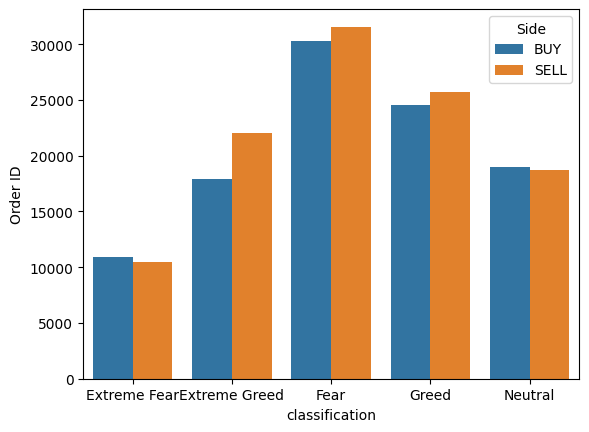

In [14]:
#Side Count vs Classification
a=df3.groupby(["classification","Side"])["Order ID"].count().reset_index()
sns.barplot(x="classification",y="Order ID",data=a,hue="Side")
plt.xticks()
plt.savefig("Side count vs classification.png")
plt.show()

In [ ]:
a=df3.groupby(["classification","Side"])["Order ID"].count().reset_index()
a

,classification,Side,Order ID
0,Extreme Fear,BUY,10935
1,Extreme Fear,SELL,10465
2,Extreme Greed,BUY,17940
3,Extreme Greed,SELL,22052
4,Fear,BUY,30270
5,Fear,SELL,31567
6,Greed,BUY,24576
7,Greed,SELL,25727
8,Neutral,BUY,18969
9,Neutral,SELL,18717


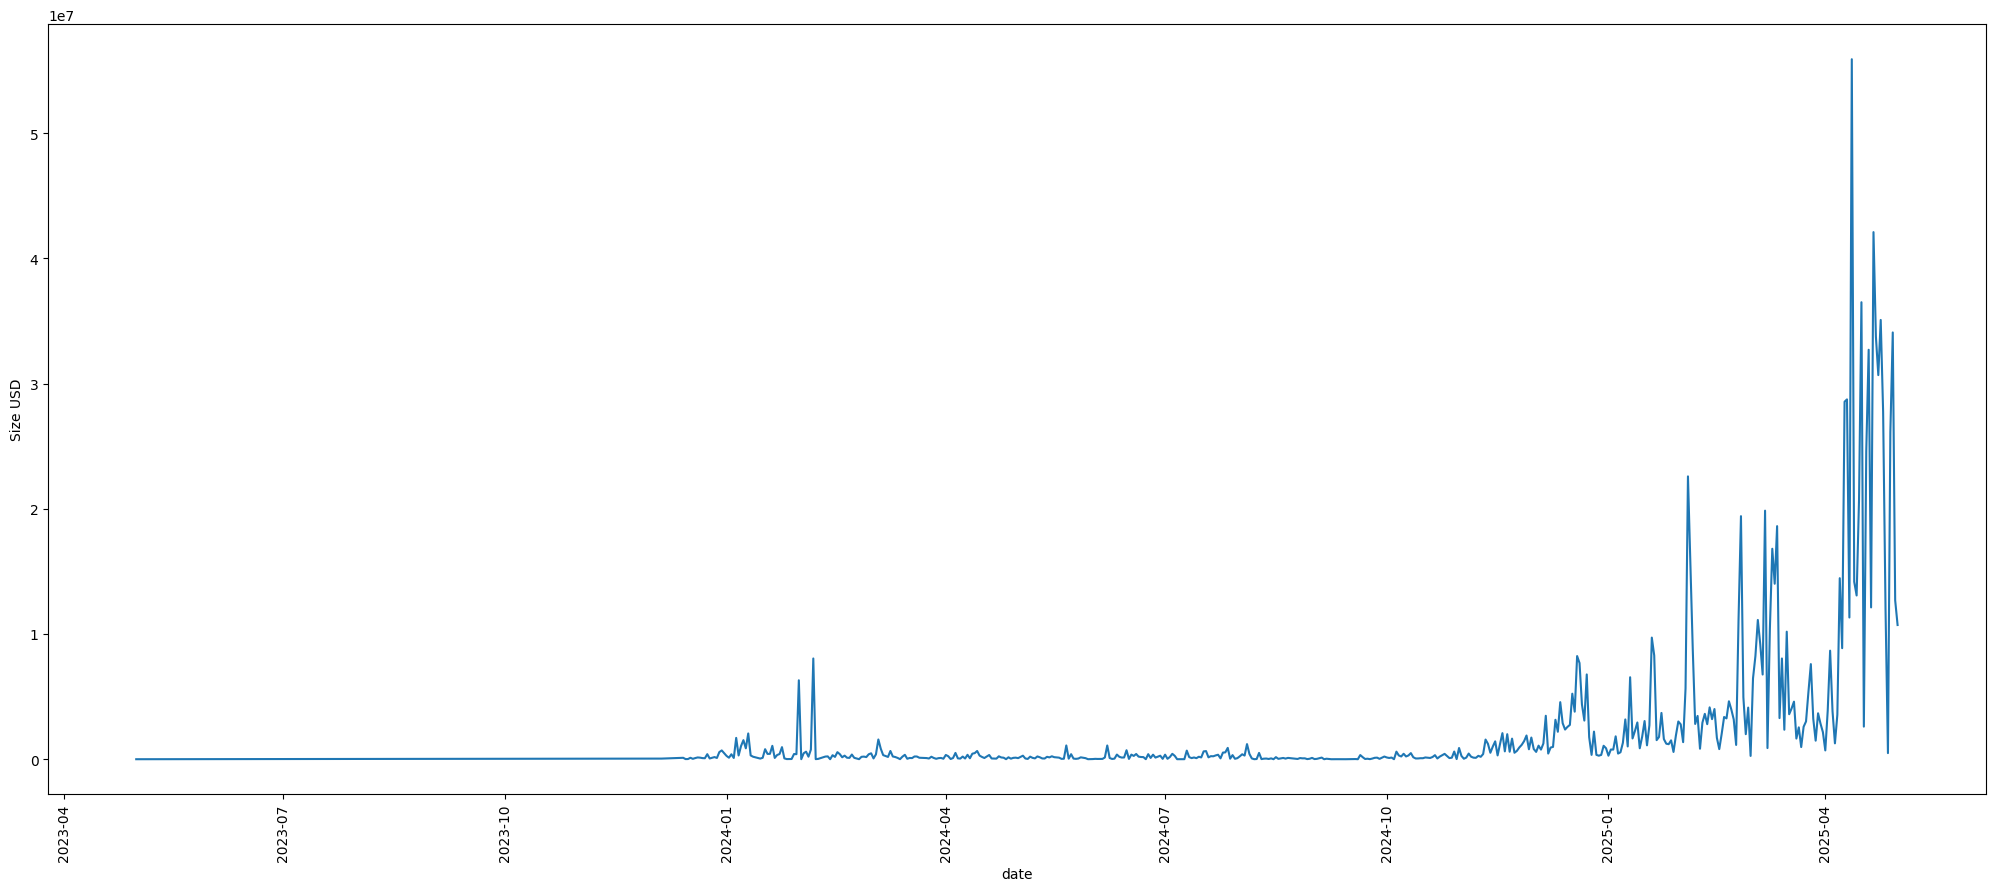

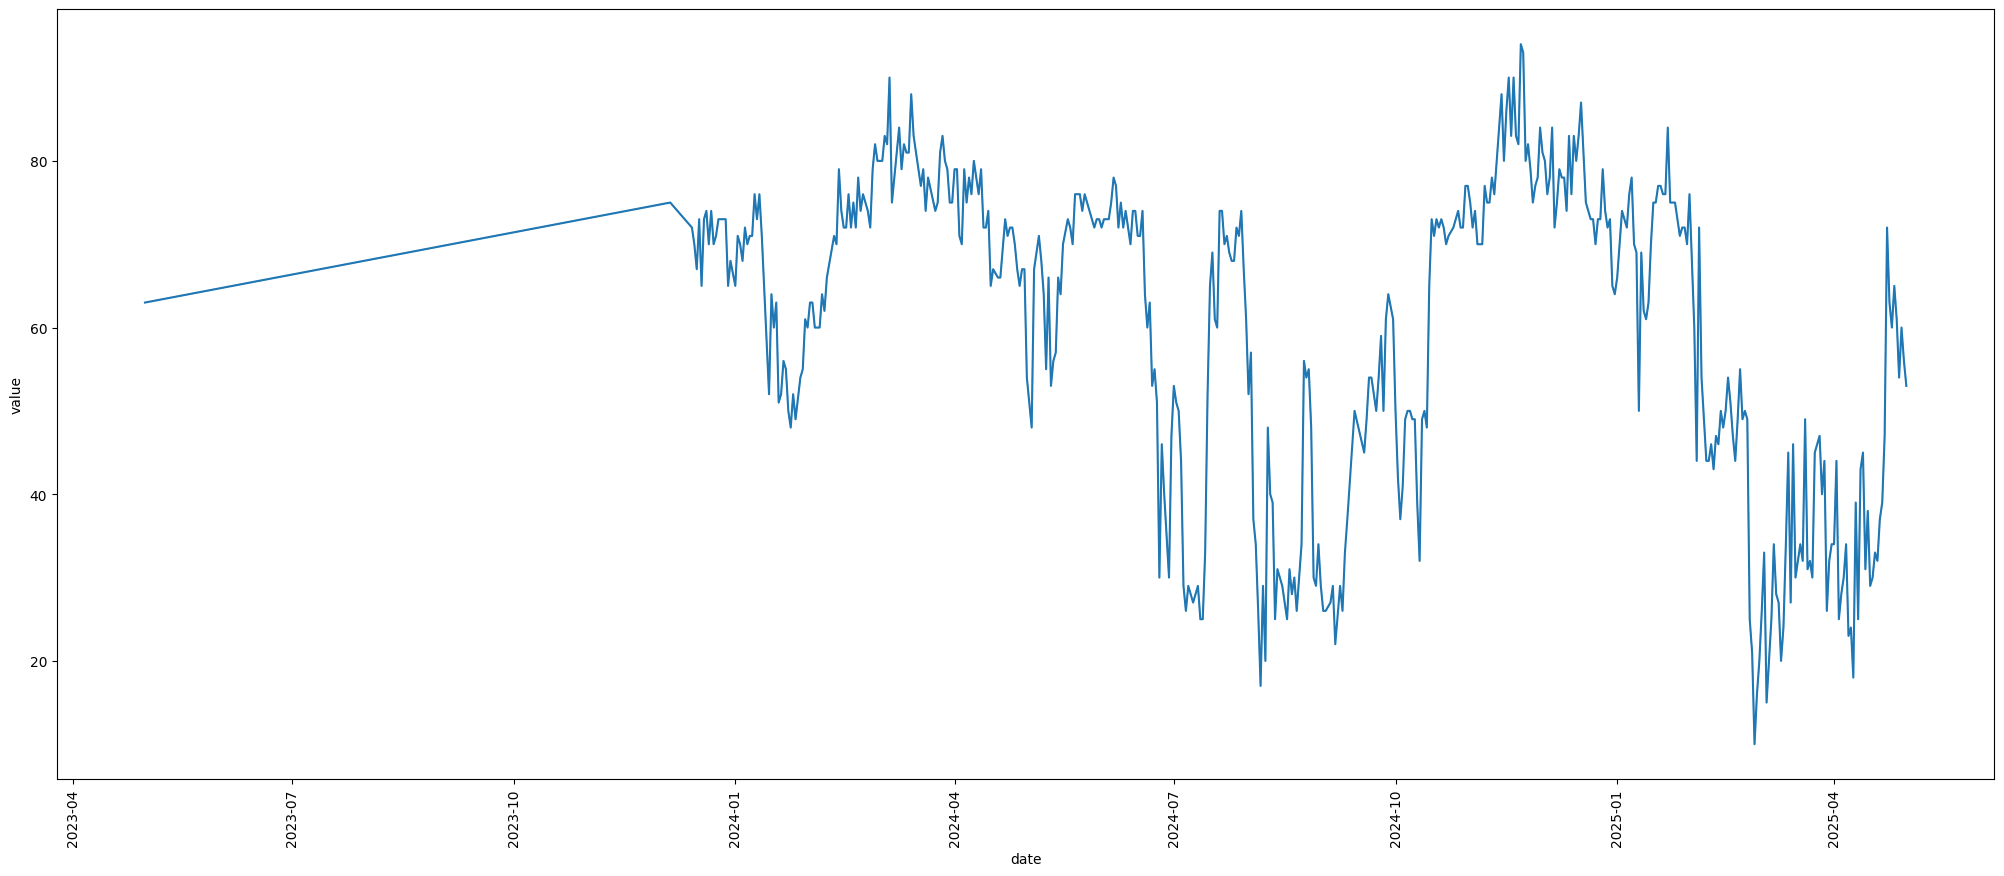

In [ ]:
plt.figure(figsize=(25,10))
a=df3.groupby("date")["Size USD"].sum().reset_index()
sns.lineplot(x=a["date"],y=a["Size USD"])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(25,10))
sns.lineplot(x=df3["date"],y=df3["value"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df3.head()

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,...,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,1682919000,63,Greed,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,...,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01
1,1682919000,63,Greed,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,...,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01
2,1682919000,63,Greed,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,...,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01
3,1701754200,75,Extreme Greed,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,...,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,1.700000e+12,2023-12-05
4,1701754200,75,Extreme Greed,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,...,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,1.700000e+12,2023-12-05


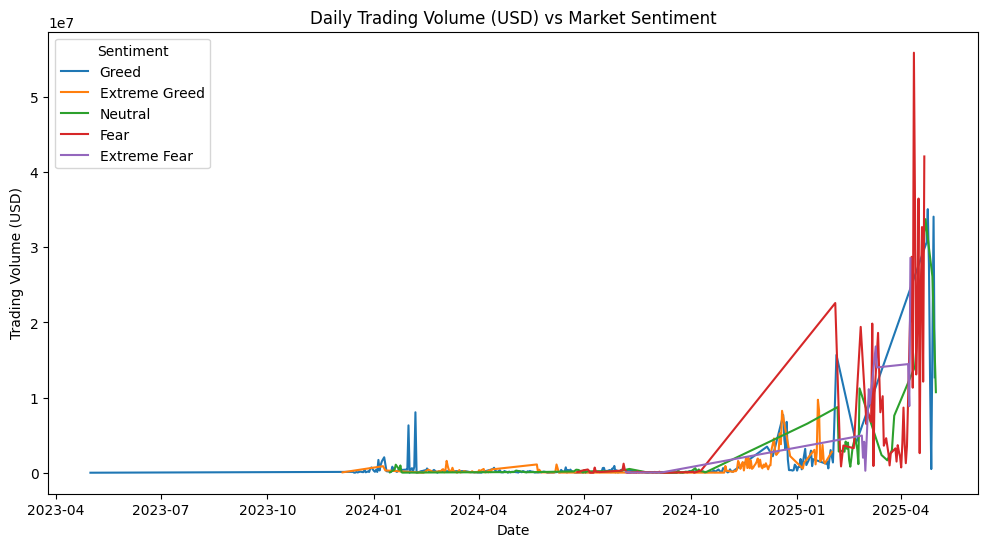

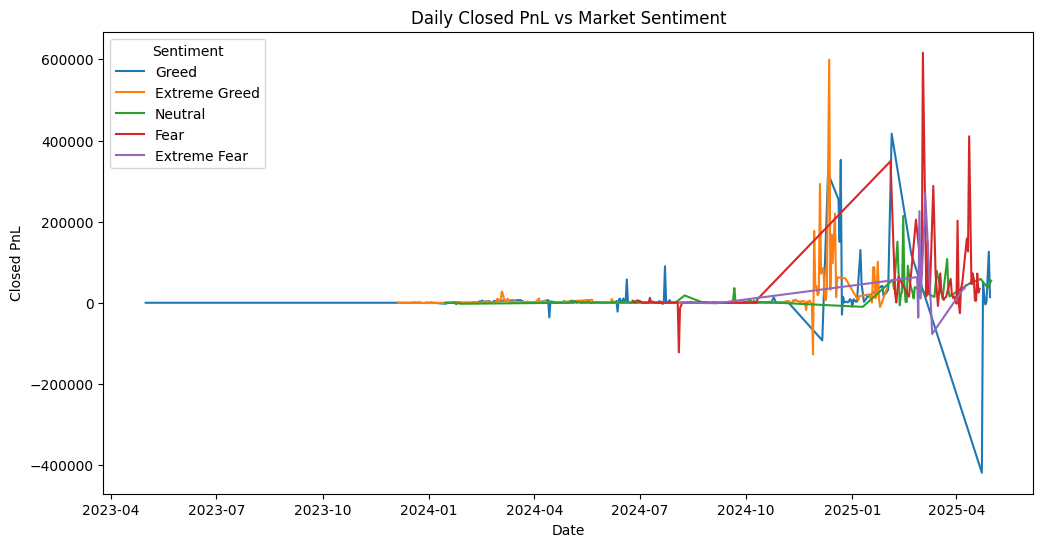

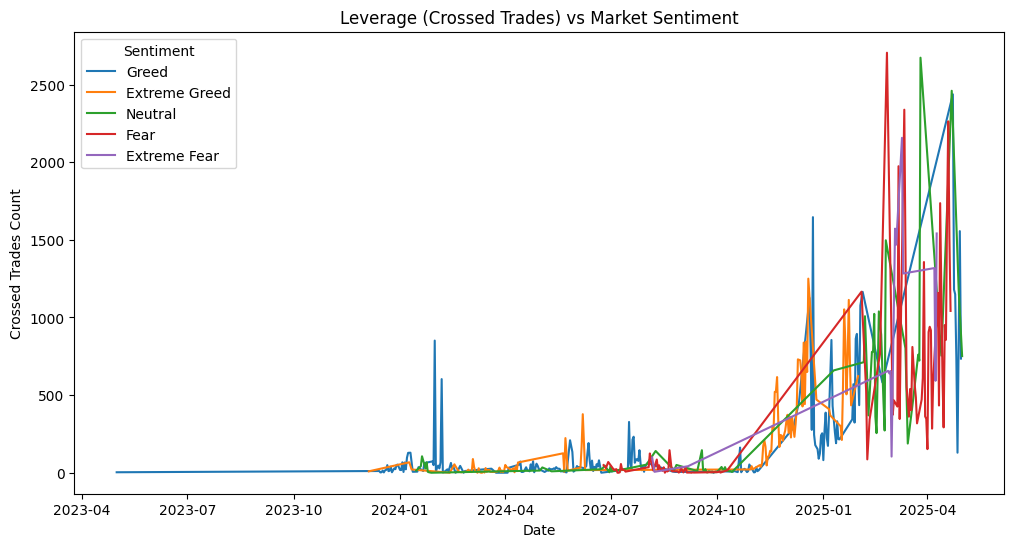

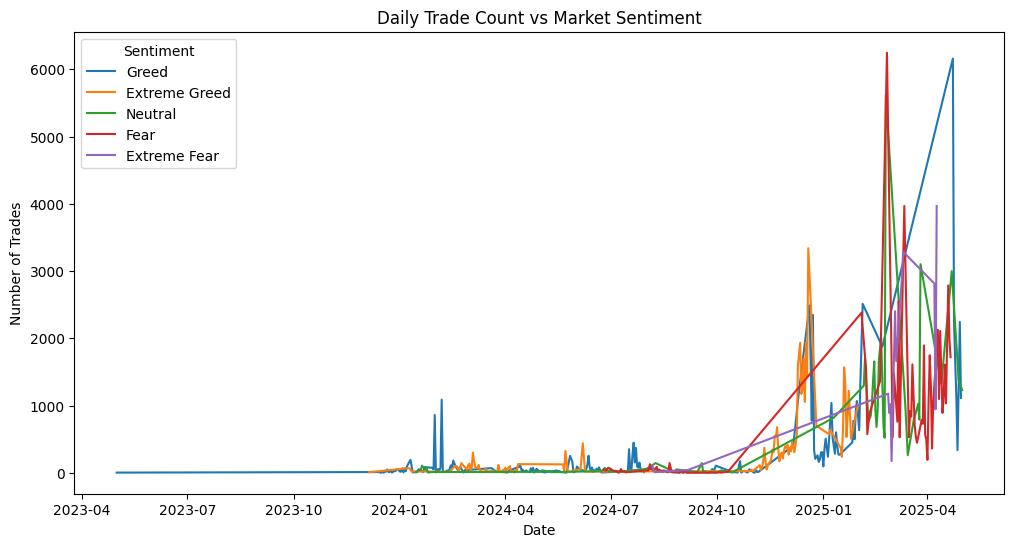

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Aggregate trading metrics by date & sentiment ---
daily_stats = df3.groupby(['date','classification']).agg({
    'Size USD':'sum',
    'Closed PnL':'sum',
    'Order ID':'count',
    'Crossed':'sum'
}).reset_index()

# --- 2. Plot trading volume over time ---
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_stats, x='date', y='Size USD', hue='classification')
plt.title("Daily Trading Volume (USD) vs Market Sentiment")
plt.ylabel("Trading Volume (USD)")
plt.xlabel("Date")
plt.legend(title="Sentiment")
plt.show()

# --- 3. Plot profitability over time ---
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_stats, x='date', y='Closed PnL', hue='classification')
plt.title("Daily Closed PnL vs Market Sentiment")
plt.ylabel("Closed PnL")
plt.xlabel("Date")
plt.legend(title="Sentiment")
plt.show()

# --- 4. Plot leverage proxy (crossed trades) ---
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_stats, x='date', y='Crossed', hue='classification')
plt.title("Leverage (Crossed Trades) vs Market Sentiment")
plt.ylabel("Crossed Trades Count")
plt.xlabel("Date")
plt.legend(title="Sentiment")
plt.show()

# --- 5. Plot trade counts (activity) ---
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_stats, x='date', y='Order ID', hue='classification')
plt.title("Daily Trade Count vs Market Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Date")
plt.legend(title="Sentiment")
plt.show()


In [15]:
df3.drop(columns=["Date","timestamp"],axis=1,inplace=True)

In [16]:
df3.to_csv("Market_Sentiment_Dataset.csv")